In [2]:
from openai import OpenAI
client = OpenAI()

In [18]:
a={'a':1,'b':2}
a.values()

dict_values([1, 2])

In [72]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np

def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

def vis_embeddings(embedding_dic, category_dict, tse_p=15, arrow_order = []):
   names = list(embedding_dic.keys())
   data = list(embedding_dic.values())
   data = np.array(data)

   categories = [category_dict[name] for name in names]
   categories = set(category_dict.values())
   color_map = {category: plt.cm.tab10(i) for i, category in enumerate(categories)}


   pca = PCA(n_components=2)
   tsne = TSNE(n_components=2, random_state=42, perplexity=tse_p)
   data_reduced = pca.fit_transform(data)
   tdata_reduced = tsne.fit_transform(data)

   plt.figure(figsize=(8, 6))
   for i, (x, y) in enumerate(data_reduced):
      plt.scatter(x, y, color=color_map[category_dict[names[i]]], marker='o', edgecolor='k', s=50)   
   texts = []
   for i, (x, y) in enumerate(data_reduced):
      texts.append(plt.text(x, y, names[i], color='red', fontsize=12))
   adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
   # draw arrows
   if len(arrow_order) > 0:
      for i in range(len(arrow_order)-1):
         current_label = arrow_order[i]
         next_label = arrow_order[i+1]
         current_index = names.index(current_label)
         next_index = names.index(next_label)
         current_point = data_reduced[current_index]
         next_point = data_reduced[next_index]
         plt.annotate('', xy=next_point, xycoords='data',
                     xytext=current_point, textcoords='data',
                     arrowprops=dict(arrowstyle="-|>,head_width=0.5,head_length=0.7", connectionstyle="arc3,rad=0.02", color='green'))
   plt.xlabel('Principal Component 1')
   plt.ylabel('Principal Component 2')
   plt.title(f'PCA of {len(data_reduced)} Tensors')
   plt.show()

   plt.figure(figsize=(8, 6))
   for i, (x, y) in enumerate(tdata_reduced):
      plt.scatter(x, y, color=color_map[category_dict[names[i]]], marker='o', edgecolor='k', s=50)  
   texts = []
   for i, (x, y) in enumerate(tdata_reduced):
      texts.append(plt.text(x, y, names[i], color='red', fontsize=12))
   adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
   # draw arrows
   if len(arrow_order) > 0:
      for i in range(len(arrow_order)-1):
         current_label = arrow_order[i]
         next_label = arrow_order[i+1]
         current_index = names.index(current_label)
         next_index = names.index(next_label)
         current_point = tdata_reduced[current_index]
         next_point = tdata_reduced[next_index]
         plt.annotate('', xy=next_point, xycoords='data',
                     xytext=current_point, textcoords='data',
                     arrowprops=dict(arrowstyle="-|>,head_width=0.5,head_length=0.7", connectionstyle="arc3,rad=0.02", color='green'))
   plt.xlabel('t-SNE Feature 1')
   plt.ylabel('t-SNE Feature 2')
   plt.title(f't-SNE Visualization of {len(tdata_reduced)} Tensors')
   plt.show()

In [9]:
import pickle
with open('nt_seq_dic.pkl', 'br') as p:
    dna_dic = pickle.load(p)

In [86]:

prompts = {}
photo_prompts = {}
for k,v in dna_dic.items():
    prompts[k] = f'This is the NT sequence of a gene: "{v}"'
    photo_prompts[k] = f'This is the NT sequence of a gene in photosynthesis: "{v}"'

In [87]:
from tqdm import tqdm

ebd_nt_small = {}
ebd_nt_large = {}
ebd_from_prompt_small = {}
ebd_from_prompt_large = {}
emd_photo_prompt_small = {}
emd_photo_prompt_large = {}

for k,v in tqdm(dna_dic.items()):
    ebd_nt_small[k] = get_embedding(v)
    ebd_nt_large[k] = get_embedding(v, model='text-embedding-3-large')
for k,v in tqdm(prompts.items()):
    ebd_from_prompt_small[k] = get_embedding(v)
    ebd_from_prompt_large[k] = get_embedding(v, model='text-embedding-3-large')
for k,v in tqdm(photo_prompts.items()):
    emd_photo_prompt_small[k] = get_embedding(v)
    emd_photo_prompt_large[k] = get_embedding(v, model='text-embedding-3-large')

100%|██████████| 54/54 [00:26<00:00,  2.02it/s]


In [61]:
category_dict = {
    'atpI': 'ATP Synthase Complex',
    'atpH': 'ATP Synthase Complex',
    'atpA': 'ATP Synthase Complex',
    'atpB': 'ATP Synthase Complex',
    'ATPD': 'ATP Synthase Complex',
    'atpE': 'ATP Synthase Complex',
    'ATPC2': 'ATP Synthase Complex',
    'petA': 'Cytochrome b6f Complex',
    'petB': 'Cytochrome b6f Complex',
    'PETC': 'Cytochrome b6f Complex',
    'petD': 'Cytochrome b6f Complex',
    'DRT112': 'Other Components',
    'FD1': 'Other Components',
    'petG': 'Cytochrome b6f Complex',
    'FNR2': 'Other Components',
    'psaA': 'Photosystem I',
    'psaB': 'Photosystem I',
    'psaC': 'Photosystem I',
    'PSAD-2': 'Photosystem I',
    'PSAE-2': 'Photosystem I',
    'PSAF': 'Photosystem I',
    'PSAH2': 'Photosystem I',
    'psaI': 'Photosystem I',
    'psaJ': 'Photosystem I',
    'PSAK': 'Photosystem I',
    'PSAL': 'Photosystem I',
    'PSAN': 'Photosystem I',
    'psbA': 'Photosystem II',
    'psbB': 'Photosystem II',
    'psbC': 'Photosystem II',
    'psbD': 'Photosystem II',
    'psbE': 'Photosystem II',
    'psbF': 'Photosystem II',
    'psbH': 'Photosystem II',
    'psbI': 'Photosystem II',
    'psbJ': 'Photosystem II',
    'psbK': 'Photosystem II',
    'psbL': 'Photosystem II',
    'psbM': 'Photosystem II',
    'PSBO2': 'Photosystem II',
    'PSBP-1': 'Photosystem II',
    'psbT': 'Photosystem II',
    'PSBW': 'Photosystem II',
    'PSBY': 'Photosystem II',
    'psbZ': 'Photosystem II',
    'PSBR': 'Photosystem II',
    'NPQ4': 'Light Harvesting Complex',
    'petN': 'Cytochrome b6f Complex',
    'PnsL2': 'Other Components',
    'PSB27': 'Light Harvesting Complex',
    'PSB28': 'Light Harvesting Complex',
    'PSAG': 'Light Harvesting Complex',
    'CYTC6A': 'Light Harvesting Complex',
    'PSAO': 'Light Harvesting Complex'
}


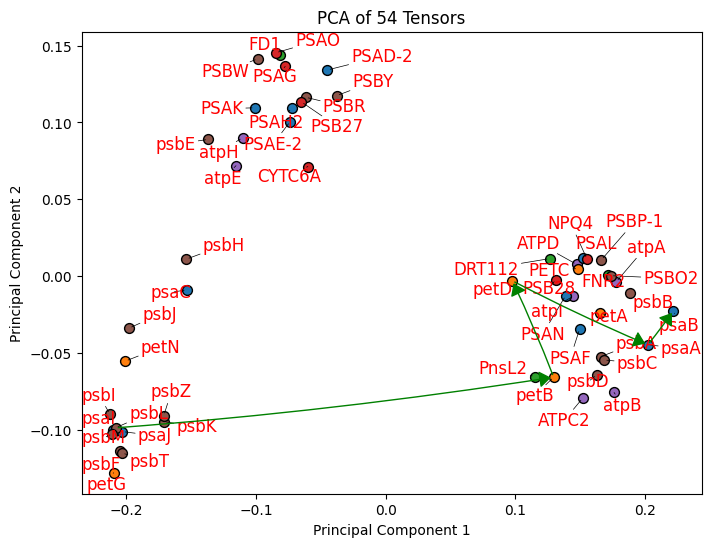

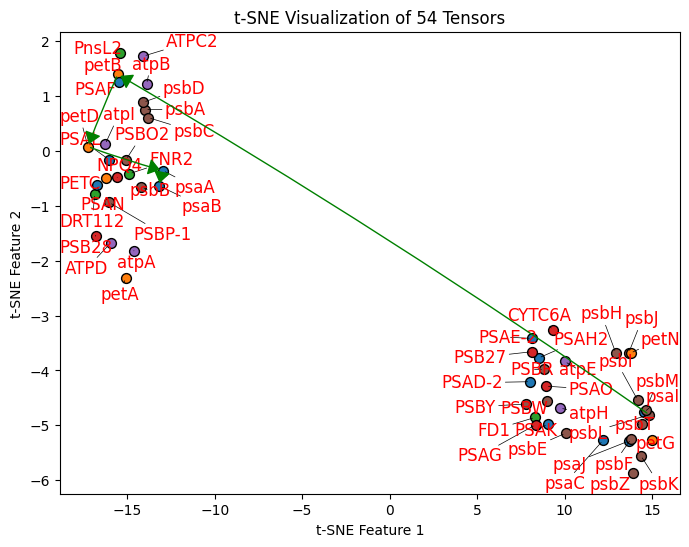

In [96]:
# vis_embeddings(ebd_nt_large, category_dict, 15, ['psbL', 'petB', 'petD', 'psaA', 'psaB'])
# vis_embeddings(ebd_from_prompt_large, category_dict, 15, ['psbL', 'petB', 'petD', 'psaA', 'psaB'])
vis_embeddings(emd_photo_prompt_large, category_dict, 15, ['psbL', 'petB', 'petD', 'psaA', 'psaB'])